We start by adding our libraries, loading the dataset and displays the basic information about the dataset.

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

import os
print("Current working directory:", os.getcwd())
# Load the dataset
sw = pd.read_csv('Skyrim_Weapons.csv')

# This displays basic information about the dataset
print("Dataset shape:", sw.shape)
print("\nFirst 5 rows:")
print(sw.head())

print("\nDataset information:")
print(sw.info())

print("\nSummary statistics:")
print(sw.describe())


Current working directory: C:\Users\Helen\PycharmProjects\Weapon_Project\Price_prediction
Dataset shape: (293, 9)

First 5 rows:
                      Name  Damage  Weight  Gold              Upgrade  \
0  Ancient Nord Battle Axe      18    22.0    28          Steel Ingot   
1        Daedric Battleaxe      25    27.0  2750          Ebony Ingot   
2    Dragonbone Battleaxe       26    30.0  3000          Dragon Bone   
3     Drainblood Battleaxe      21     5.0   266                  NaN   
4        Dwarven Battleaxe      20    23.0   300  Dwarven Metal Ingot   

      Perk       Type    Category  Speed  
0    Steel  Battleaxe  Two-Handed    NaN  
1  Daedric  Battleaxe  Two-Handed    NaN  
2   Dragon  Battleaxe  Two-Handed    NaN  
3        -  Battleaxe  Two-Handed    NaN  
4  Dwarven  Battleaxe  Two-Handed    NaN  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293 entries, 0 to 292
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ----

Then we checks for missing values.

In [5]:
# Check for missing values
print("\nMissing values:")
sw.isnull().sum()



Missing values:


Name          0
Damage        0
Weight        0
Gold          0
Upgrade      61
Perk         83
Type          0
Category      0
Speed       254
dtype: int64

We then check for the size of the dataset, and what types the columns are, so that we get some more information for later,
about which columns we might need to change the types for.

In [6]:
## Size of the dataset and Type of each column in the dataset
print("Size of the dataset", sw.shape, "\n")
print("Type of each column\n", sw.dtypes)

Size of the dataset (293, 9) 

Type of each column
 Name         object
Damage        int64
Weight      float64
Gold          int64
Upgrade      object
Perk         object
Type         object
Category     object
Speed       float64
dtype: object


Then we use describe, to extract metadata.

In [7]:
print(sw.describe())

           Damage      Weight         Gold      Speed
count  293.000000  293.000000   293.000000  39.000000
mean    13.017065   12.590444   521.300341   0.765923
std      5.692736    7.649840   732.009566   0.165776
min      0.000000    0.000000     0.000000   0.500000
25%      9.000000    9.000000    45.000000   0.625000
50%     12.000000   12.000000   188.000000   0.750000
75%     17.000000   17.000000   727.000000   0.875000
max     28.000000   36.000000  4275.000000   1.000000


Then we check for duplicates in the dataset.


In [8]:
## Number of duplicates in the dataset
print("Number of duplicates in the dataset", sw.duplicated().sum())
print(sw.count().sum())

Number of duplicates in the dataset 0
2239


We then choose to delete the speed column, as more than 85% of this column is empty.


In [9]:
sw.drop(['Speed'], axis=1, inplace=True)
sw.head()

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category
0,Ancient Nord Battle Axe,18,22.0,28,Steel Ingot,Steel,Battleaxe,Two-Handed
1,Daedric Battleaxe,25,27.0,2750,Ebony Ingot,Daedric,Battleaxe,Two-Handed
2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Dragon,Battleaxe,Two-Handed
3,Drainblood Battleaxe,21,5.0,266,NaN,-,Battleaxe,Two-Handed
4,Dwarven Battleaxe,20,23.0,300,Dwarven Metal Ingot,Dwarven,Battleaxe,Two-Handed


We then check which columns there are, so we can use the names later.


In [10]:
print (sw.columns.tolist())

['Name', 'Damage', 'Weight', 'Gold', 'Upgrade', 'Perk', 'Type', 'Category']


After that, we check for null values ( - or NaN ) and removes all columns which have these.


In [11]:
sw.replace(["-", "–"], np.nan, inplace=True)

# Drop rows that have NaN in ANY column
sw.dropna(inplace=True)

sw.head(30)

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category
0,Ancient Nord Battle Axe,18,22.0,28,Steel Ingot,Steel,Battleaxe,Two-Handed
1,Daedric Battleaxe,25,27.0,2750,Ebony Ingot,Daedric,Battleaxe,Two-Handed
2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Dragon,Battleaxe,Two-Handed
4,Dwarven Battleaxe,20,23.0,300,Dwarven Metal Ingot,Dwarven,Battleaxe,Two-Handed
5,Ebony Battleaxe,23,26.0,1585,Ebony Ingot,Ebony,Battleaxe,Two-Handed
6,Elven Battleaxe,21,24.0,520,Refined Moonstone,Elven,Battleaxe,Two-Handed
7,Glass Battleaxe,22,25.0,900,Refined Malachite,Glass,Battleaxe,Two-Handed
9,Honed Ancient Nord Battle Axe,21,25.0,50,Steel Ingot,Dwarven,Battleaxe,Two-Handed
11,Nord Hero Battle Axe,21,20.0,300,Steel Ingot,Steel,Battleaxe,Two-Handed
12,Nordic Battleaxe DR,21,23.0,650,Quicksilver Ingot,Advanced,Battleaxe,Two-Handed


In [12]:
# Check for missing values again to make sure there is no more missing values
print("\nMissing values:")
sw.isnull().sum()


Missing values:


Name        0
Damage      0
Weight      0
Gold        0
Upgrade     0
Perk        0
Type        0
Category    0
dtype: int64

We then make our first diagram. This diagram shows the relation between the category of weapons and types.


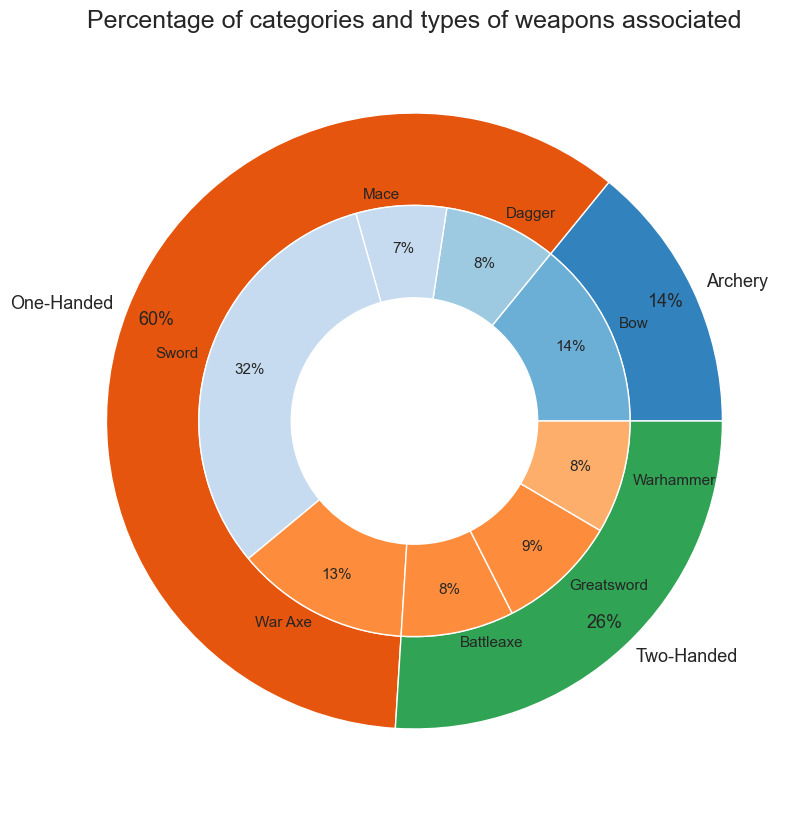

In [13]:
#Group by category and show the type of weapons associated. Qualitative-qualitative chart.
cattypeunique   = sw.groupby(["Category","Type"]).count()["Name"]
cattypeunvalues = cattypeunique.values
catsum = cattypeunique.groupby(level=["Category"], sort=False).sum()
typsum = cattypeunique.groupby(level=["Type"], sort=False).sum()

fig, ax = plt.subplots(figsize=(10,10))

size = 0.3
vals = cattypeunique
cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 3, 3, 5, 5, 5, 6, 7, 9, 10, 11])

# Labels defining for both layers of the pie
labels_inner = typsum.index
labels_outer = catsum.index

ax.pie(catsum, 
       radius=1, colors=outer_colors,
       wedgeprops=dict(width=size, edgecolor='w'), 
       labels=labels_outer, labeldistance =1.05, textprops={'fontsize': 13},
       autopct='%1.0f%%', pctdistance=0.9)

ax.pie(typsum.values, 
       radius=1-size, colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'), 
       labels=labels_inner, labeldistance =1.05, textprops={'fontsize': 11}, 
       autopct='%1.0f%%', pctdistance=0.8)


ax.set(aspect="equal")
plt.title('Percentage of categories and types of weapons associated', fontsize = 18)
plt.show();

Then we make another diagram to show the damage distribution of the weapons.


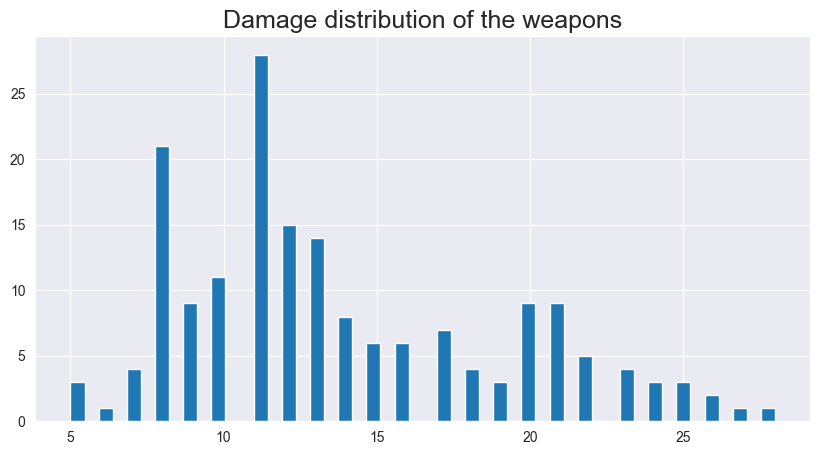

In [14]:
# Histogram of the damages
n_bins = 50
# logbins = np.logspace(np.log10(n_bins[0]),np.log10(n_bins[-1]),len(n_bins))
damhist = sw["Damage"]

plt.figure(figsize = (10,5))
plt.hist(damhist, bins=n_bins, log = False);
plt.title("Damage distribution of the weapons", fontsize = 18);

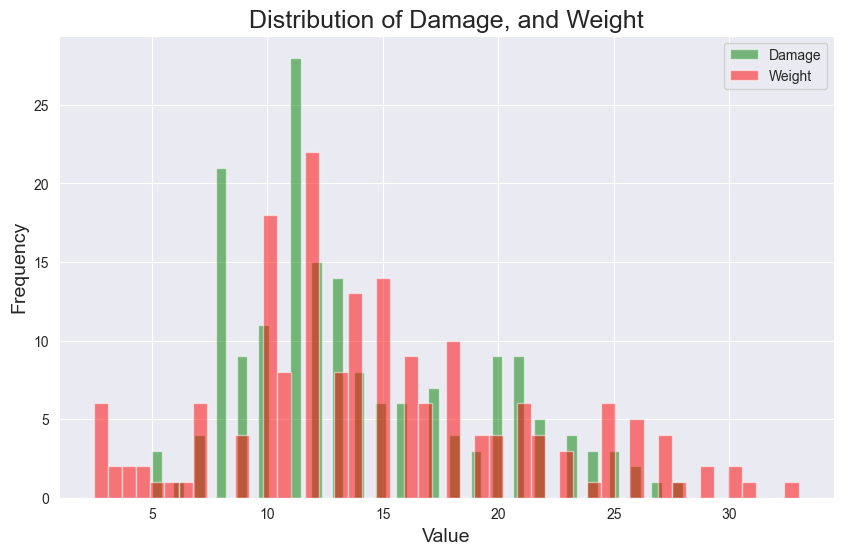

In [15]:

# Prepare the data
data = sw[['Damage', 'Weight']]

# Plot the histogram
plt.figure(figsize=(10, 6))

# Plot each feature with different colors
plt.hist(data['Damage'], bins=50, alpha=0.5, label='Damage', color='green')
plt.hist(data['Weight'], bins=50, alpha=0.5, label='Weight', color='red')

# Add titles and labels
plt.title('Distribution of Damage, and Weight', fontsize=18)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show legend
plt.legend()

# Display the plot
plt.show()

In [16]:
print(sw.columns)  # This will list all the column names in your DataFrame


Index(['Name', 'Damage', 'Weight', 'Gold', 'Upgrade', 'Perk', 'Type',
       'Category'],
      dtype='object')


After this, we apply ordinal encoding, to convert categorical variables into numerical.


In [17]:
# Columns you want to encode
categorical_cols = ['Name', 'Upgrade', 'Perk', 'Type']

# Create encoder instance
encoder = OrdinalEncoder()

# Create a temporary DataFrame to avoid changing the original one
sw_temp = sw.copy()

# Fit and transform the categorical columns into numbers
sw_temp[categorical_cols] = encoder.fit_transform(sw_temp[categorical_cols])

# Now all categorical values are numeric
print(sw_temp.head())

   Name  Damage  Weight  Gold  Upgrade  Perk  Type    Category
0   0.0      18    22.0    28     11.0   8.0   0.0  Two-Handed
1  23.0      25    27.0  2750      3.0   1.0   0.0  Two-Handed
2  40.0      26    30.0  3000      1.0   2.0   0.0  Two-Handed
4  49.0      20    23.0   300      2.0   3.0   0.0  Two-Handed
5  58.0      23    26.0  1585      3.0   4.0   0.0  Two-Handed


We then removes the name and upgrade, to make a better correlation heatmap.


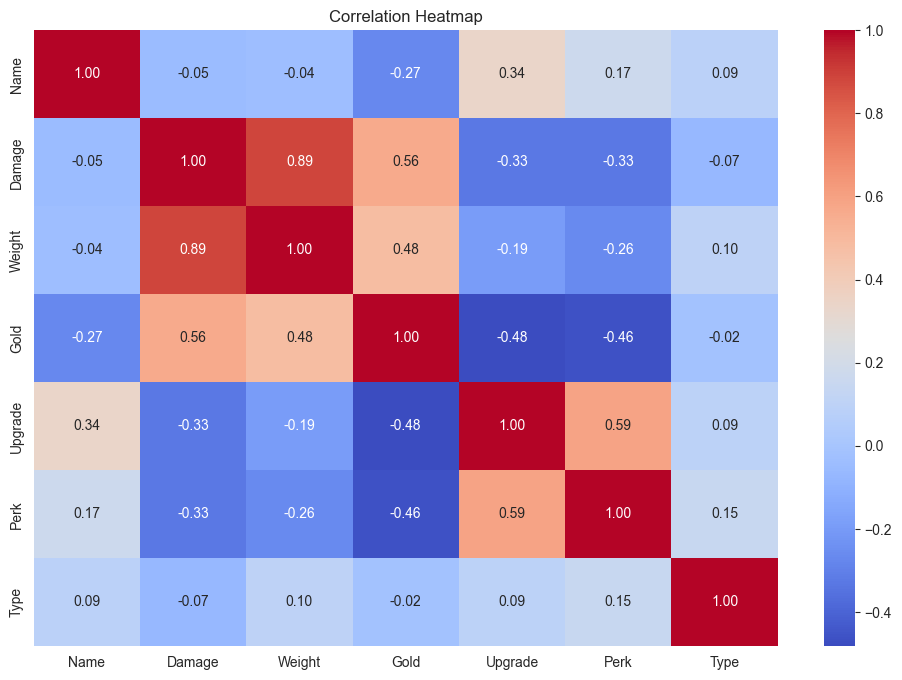

In [18]:
# Calculate the correlation matrix
sw_temp = sw_temp.apply(pd.to_numeric, errors='coerce')

# Now remove all rows with NaN values (to ensure only numeric data remains)
sw_temp = sw_temp.dropna(axis=1, how='any')

# Check correlation matrix for only numeric columns
correlation_matrix = sw_temp.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

Now we begin our price prediction. We start of by sorting the values in relation to the correlation matrix, to find out which
categories might be in correlation to the price.

In [19]:
correlation_gold = correlation_matrix['Gold'].sort_values(ascending=False).to_frame()

# Add scrollable output inside the notebook
correlation_gold.style.set_sticky().set_table_attributes("style='height:400px; overflow-y:auto; display:block'")


,Gold
Gold,1.000000
Damage,0.560687
Weight,0.483666
Type,-0.019196
Name,-0.269191
Perk,-0.462071
Upgrade,-0.482477


After that, we pick the relevant features based on the correlation, and checks our R2 score and RMSE.


In [20]:
# Define the relevant features and target
features = ['Damage', 'Weight']  # Example features (Category is categorical)
target = 'Gold'

# Extract features and target from the dataset
X = sw_temp[features]
y = sw_temp[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a column transformer for encoding categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', ['Damage', 'Weight'])  # Keep 'Damage' and 'Weight' as they are
    ])

# Create a pipeline that first applies preprocessing and then trains the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("R2 Score:", r2_score(y_test, y_pred))

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = mse ** 0.5

print("RMSE:", rmse)

R2 Score: 0.5726967903658331
RMSE: 537.2842173671172


R2 score is 0.78, which means our model explains about 78% of the variance in weapons, and RMSE is 384 which means our price predictions
are off by around 384 gold.
We then use this to make another model, which visually shows the actual price vs the predicted price in gold. For good sake, we try some other regression models.

In [21]:
from sklearn.linear_model import LinearRegression

# Replace RandomForestRegressor with LinearRegression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
print("R2 Score:", r2_score(y_test, y_pred))

# MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("RMSE:", rmse)


R2 Score: 0.3966630287784604
RMSE: 638.4339527929294


Here, we see that our RandomForestGenerator gives a better R2 and RMSE score than the Linear regression.

In [22]:
# Create a copy of the DataFrame to avoid permanent changes
sw_temp = sw.copy()

# Now perform the grouping with the original string values (no encoding needed)
for col in ['Type', 'Perk', 'Upgrade']:
    print(f"\nAverage Gold by {col}:")
    print(sw_temp.groupby(col)['Gold'].mean().sort_values(ascending=False).round(2))



Average Gold by Type:
Type
Warhammer     1115.73
Battleaxe      864.53
Greatsword     800.50
Bow            748.68
Mace           698.33
Sword          597.21
War Axe        353.13
Dagger         225.13
Name: Gold, dtype: float64

Average Gold by Perk:
Perk
Dragon      2315.62
Daedric     1960.90
Ebony       1360.62
Glass        732.81
Advanced     460.00
Elven        441.31
Dwarven      425.27
Steel        304.13
Orcish       116.00
Name: Gold, dtype: float64

Average Gold by Upgrade:
Upgrade
Dragon Bone                2315.62
Stalhrim                   1588.12
Ebony Ingot                1585.26
None required               880.00
Quicksilver Ingot           869.57
Refined Malachite           732.81
Refined Moonstone           441.31
Daedra HeartEbony Ingot     427.00
Dwarven Metal Ingot         264.44
Steel Ingot                 244.99
Orichalcum Ingot            116.00
Leather Strips               50.00
Name: Gold, dtype: float64


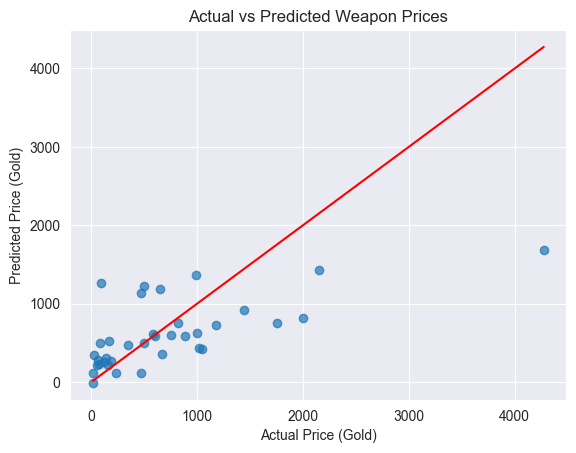

In [23]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Price (Gold)")
plt.ylabel("Predicted Price (Gold)")
plt.title("Actual vs Predicted Weapon Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')  # perfect prediction line
plt.show()

Now its time to try out our price prediction. We start by making a new weapon and adds it to our dataframe.

In [24]:
new_weapon = {
    'Damage': 15,
    'Weight': 18,
    'Upgrade': 'Steel Ingot',
    'Perk': 'Steel',
    'Type': 'War Axe',
}


# Create the input DataFrame
new_df = pd.DataFrame([new_weapon])

# Combine with original dataset to align columns
combined = pd.concat([new_df, sw], ignore_index=True)

# One-hot encode (use same columns as during training)
combined_encoded = pd.get_dummies(combined, drop_first=True)

# Make sure the new data has the same columns as X (training features)
combined_encoded = combined_encoded.reindex(columns=X.columns, fill_value=0)

# Take just the first row (the new weapon)
new_encoded = combined_encoded.iloc[[0]]

print(new_weapon)


{'Damage': 15, 'Weight': 18, 'Upgrade': 'Steel Ingot', 'Perk': 'Steel', 'Type': 'War Axe'}


After that, we predict the price of our newly created weapon.


In [25]:
predicted_price = model.predict(new_encoded)
print(f"Predicted Price (Gold): {predicted_price[0]:.2f}")


Predicted Price (Gold): 688.82


In [26]:
dump(model, "model.pkl")
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
sw[categorical_cols] = encoder.fit_transform(sw[categorical_cols])

dump(encoder, "ordinal_encoder.pkl")

['ordinal_encoder.pkl']

In [27]:
print(sw.columns)

Index(['Name', 'Damage', 'Weight', 'Gold', 'Upgrade', 'Perk', 'Type',
       'Category'],
      dtype='object')
